In [15]:
import kagglehub
import shutil

from PIL import Image

import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

# Define the target path where you want to store the dataset in the content folder
colab_content_path = '/content/driver-drowsiness-dataset-ddd'

# Move the dataset to the content folder
shutil.move(path, colab_content_path)

print("Path to dataset files:", colab_content_path)

100%|██████████| 2.58G/2.58G [01:56<00:00, 23.8MB/s]


Extracting files...
Path to dataset files: /content/driver-drowsiness-dataset-ddd


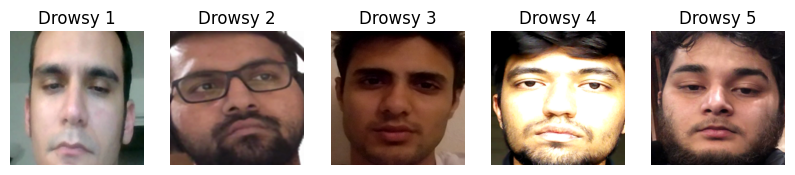

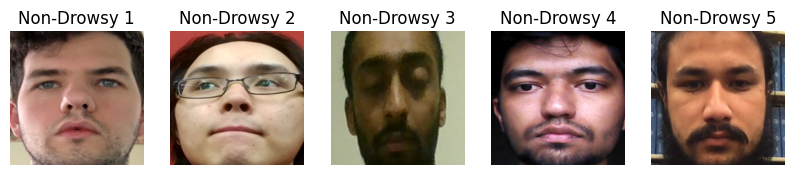

In [3]:
# Path to the "Drowsy" label folder
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'

# List all files in the "Drowsy" folder
image_files = os.listdir(drowsy_folder_path)

# Show the first few images to inspect
num_images_to_show = 5  # You can adjust this number

plt.figure(figsize=(10, 10))

for i in range(min(num_images_to_show, len(image_files))):
    image_path = os.path.join(drowsy_folder_path, image_files[i])

    # Open the image
    image = Image.open(image_path)

    # Plot image
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(f"Drowsy {i + 1}")

plt.show()

# Path to the "Drowsy" label folder
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# List all files in the "Drowsy" folder
image_files = os.listdir(non_drowsy_folder_path)

# Show the first few images to inspect
num_images_to_show = 5  # You can adjust this number

plt.figure(figsize=(10, 10))

for i in range(min(num_images_to_show, len(image_files))):
    image_path = os.path.join(non_drowsy_folder_path, image_files[i])

    # Open the image
    image = Image.open(image_path)

    # Plot image
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(f"Non-Drowsy {i + 1}")

plt.show()

Number of Drowsy images: 22348
Number of Non-Drowsy images: 19445


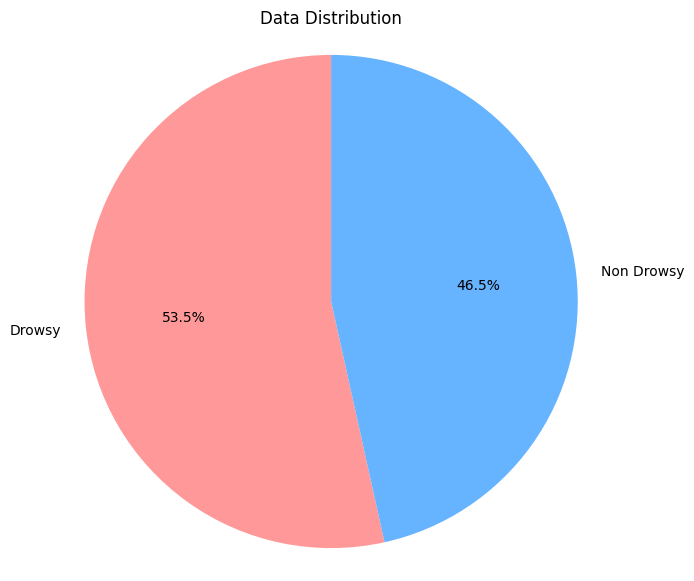

Average image dimensions for Drowsy images: (227.0, 227.0)
Average image dimensions for Non-Drowsy images: (227.0, 227.0)


In [4]:
# Paths to the labels
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count the images in both folders
drowsy_count = count_images_in_folder(drowsy_folder_path)
non_drowsy_count = count_images_in_folder(non_drowsy_folder_path)

# Print the counts
print(f"Number of Drowsy images: {drowsy_count}")
print(f"Number of Non-Drowsy images: {non_drowsy_count}")

# Pie chart showing data distribution
labels = ['Drowsy', 'Non Drowsy']
sizes = [drowsy_count, non_drowsy_count]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Data Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Additional Analysis: Calculate average image dimensions for both categories
def get_image_dimensions(folder_path):
    image_sizes = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if os.path.isfile(image_path):
            with Image.open(image_path) as img:
                image_sizes.append(img.size)
    return image_sizes

# Get dimensions of images in both folders
drowsy_sizes = get_image_dimensions(drowsy_folder_path)
non_drowsy_sizes = get_image_dimensions(non_drowsy_folder_path)

# Calculate average dimensions
def calculate_average_dimensions(image_sizes):
    widths, heights = zip(*image_sizes)
    return (sum(widths) / len(widths), sum(heights) / len(heights))

avg_drowsy_dimensions = calculate_average_dimensions(drowsy_sizes)
avg_non_drowsy_dimensions = calculate_average_dimensions(non_drowsy_sizes)

print(f"Average image dimensions for Drowsy images: {avg_drowsy_dimensions}")
print(f"Average image dimensions for Non-Drowsy images: {avg_non_drowsy_dimensions}")

In [ ]:
# Paths to the "Drowsy" and "Non Drowsy" folders
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# Function to load and preprocess images using PIL and convert them to numpy arrays
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Open image with PIL and resize it
            img = Image.open(img_path).resize((224, 224))  # Resize to 224x224
            img_array = np.array(img)  # Convert image to numpy array
            img_array = img_array / 255.0  # Normalize to [0, 1]
            images.append(img_array)
            labels.append(label)
    return images, labels

In [8]:
# Load images and labels for both categories
drowsy_images, drowsy_labels = load_images_from_folder(drowsy_folder_path, 1)  # 1 for Drowsy
non_drowsy_images, non_drowsy_labels = load_images_from_folder(non_drowsy_folder_path, 0)  # 0 for Non-Drowsy

# Combine both datasets
images = np.array(drowsy_images + non_drowsy_images)
labels = np.array(drowsy_labels + non_drowsy_labels)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (33434, 224, 224, 3)
X_val shape: (4179, 224, 224, 3)
X_test shape: (4180, 224, 224, 3)


In [9]:
# Step 3: Build the Custom CNN Model

model = models.Sequential([
    # First Convolution Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolution Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolution Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolution Layer
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Global Average Pooling
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,361 (1.61 MB)

 Trainable params: 422,401 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 7.1546e-06
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9998 - val_loss: 2.9721e-04
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9998 - loss: 9.2787e-04 - val_accuracy: 1.0000 - val_loss: 9.7772e-06
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9990 - val_loss: 0.0022
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.5866e-05
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 1.1496e-04
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 6.1306e-07
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 15s 14

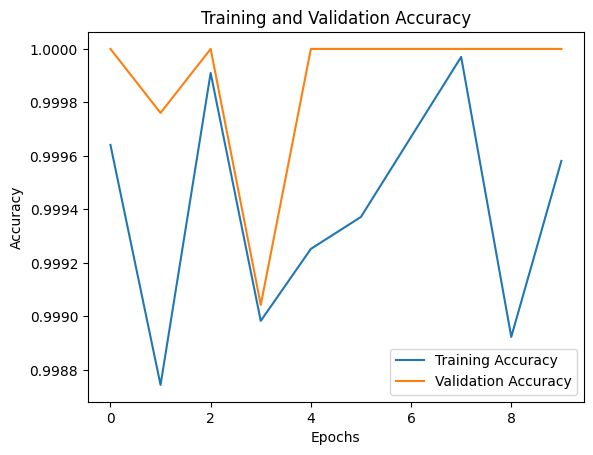

In [11]:
# Step 4: Train the Model

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Step 5: Evaluate the Model

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Visualize the Training Process

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1045/1045 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 1.0000 - loss: 3.7452e-05
Training Accuracy: 100.00%
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.6540e-06
Validation Accuracy: 100.00%
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.8538e-06
Test Accuracy: 100.00%
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[1862    0]
 [   0 2318]]


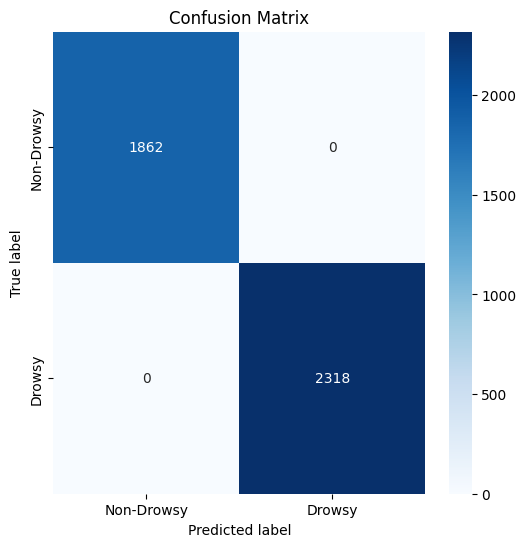

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Step 1: Calculate Training, Validation, and Test Accuracy

# Calculate training accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate validation accuracy
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 2: Make Predictions on Test Set
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary class labels (0 or 1)

# Step 3: Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 6: Visualize Confusion Matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Drowsy", "Drowsy"], yticklabels=["Non-Drowsy", "Drowsy"])
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
model.save('Drowsiness Detection.keras')